# <center>**Bioseñales y sistemas**
## <center>**Proyecto procesamiento de señales EMG**
## <center>**Seguimiento 1**
#### Maria Alejandra Escobar - C.C 1004425012
#### Juan Manuel Martínez - C.C 1007739919


## INFORME

### Electromiografía
La electromiografía (EMG) es una técnica que permite registrar la actividad eléctrica generada por los músculos durante su contracción y relajación. Esta señal eléctrica se conoce como señal electromiográfica y presenta características específicas que la diferencian de otras señales bioeléctricas. Las principales características de una señal electromiografía son:

**Amplitud:** La amplitud de la señal EMG oscila típicamente entre 0 y 10 mV, dependiendo de la fuerza de contracción muscular y la distancia entre los electrodos y las fibras musculares activas.

**Frecuencia:** El rango de frecuencias de la señal EMG se encuentra típicamente entre 20 y 500 Hz, con la mayor parte de la energía concentrada entre 50 y 150 Hz.

**Naturaleza estocástica:** La señal EMG es una señal aleatoria y no periódica, ya que representa la suma de los potenciales de acción de las unidades motoras activas en un músculo.
Dependencia de la fuerza: La amplitud y la frecuencia de la señal EMG aumentan con la fuerza de contracción muscular.

**Interferencia:** La señal EMG puede verse afectada por ruido e interferencias de fuentes externas, como otros dispositivos eléctricos o la actividad de otros músculos cercanos [1].

### Operador TKEO
El operador de TKEO (Teager-Kaiser Energy Operator) es una herramienta ampliamente utilizada en el análisis de señales bioeléctricas, como la señal electromiográfica. El operador de TKEO es un operador no lineal que proporciona una estimación de la energía instantánea de una señal [2].

En el caso de la señal electromiográfica, el operador de TKEO resalta las componentes de alta frecuencia y amplitud de la señal. La interpretación de los valores del operador de TKEO se basa en la idea de que valores altos indican una mayor actividad muscular en ese instante de tiempo. Por lo tanto, los picos y las áreas con valores elevados del operador de TKEO pueden utilizarse para detectar y analizar las contracciones musculares en la señal electromiográfica.

**[1]** Merletti, R., & Parker, P. J. (Eds.). (2004). Electromyography: physiology, engineering, and non-invasive applications (Vol. 11). John Wiley & Sons.

**[2]** Solnik, S., Rider, P., Steinweg, K., DeVita, P., & Hortobágyi, T. (2010). Teager–Kaiser energy operator signal conditioning improves EMG onset detection. European journal of applied physiology, 110, 489-498.

In [3]:
import scipy.io as sio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

## Punto 0 
Vamos motivados, esto está fácil

In [4]:
import os
import glob
ruta_p = 'EMG_data_for_gestures-master'
i = 0
diccionario_3d = {} 
for carpeta in os.listdir(ruta_p):
    i+=1
    carpeta_path = os.path.join(ruta_p, carpeta)
    archivos = glob.glob(os.path.join(carpeta_path, '*'))
    if len(archivos)>0:
        primer_archivo = archivos[0]
        df = pd.read_csv(primer_archivo, delimiter="\t")
        diccionario_3d[i] = df
#print(diccionario_3d)
#print(diccionario_3d[1]['channel1'])
#print(diccionario_3d[12])
#print(diccionario_3d[12].shape)
#plt.plot(diccionario_3d[12]['time'],diccionario_3d[12]['channel1'])

In [5]:
diccionario_3d.values()

dict_values([        time  channel1  channel2  channel3  channel4  channel5  channel6  \
0          1   0.00001  -0.00002  -0.00001  -0.00003   0.00000  -0.00001   
1          5   0.00001  -0.00002  -0.00001  -0.00003   0.00000  -0.00001   
2          6  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002   
3          7  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002   
4          8  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002   
...      ...       ...       ...       ...       ...       ...       ...   
63191  65657  -0.00001   0.00001  -0.00005  -0.00001  -0.00003  -0.00001   
63192  65658  -0.00001   0.00001  -0.00005  -0.00001  -0.00003  -0.00001   
63193  65659  -0.00001   0.00001  -0.00005  -0.00001  -0.00003  -0.00001   
63194  65660  -0.00001   0.00001  -0.00005  -0.00001  -0.00003  -0.00001   
63195  65661  -0.00001   0.00001  -0.00005  -0.00001  -0.00003  -0.00001   

       channel7  channel8  class  
0       0.00000  -0.00001      0  
1   

## Punto 1
Joaa a penas

In [6]:
def tkeo(a):
	# Create two temporary arrays of equal length, shifted 1 sample to the right
	# and left and squared:
	a = np.array(a)
	i = a[1:-1]*a[1:-1]
	j = a[2:]*a[:-2]
	aTkeo = i-j
	return aTkeo

	# Calculate the difference between the two temporary arrays:
	

[2.e-10 2.e-10 0.e+00 ... 0.e+00 0.e+00 0.e+00]


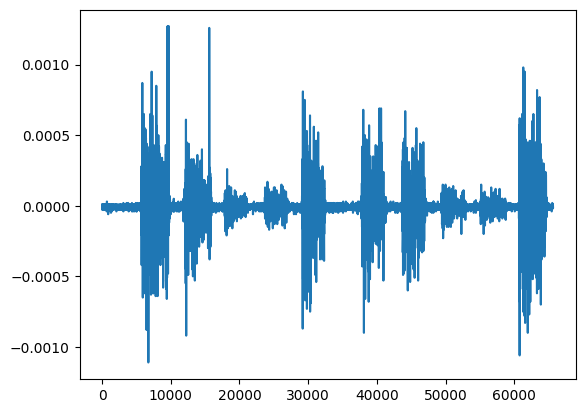

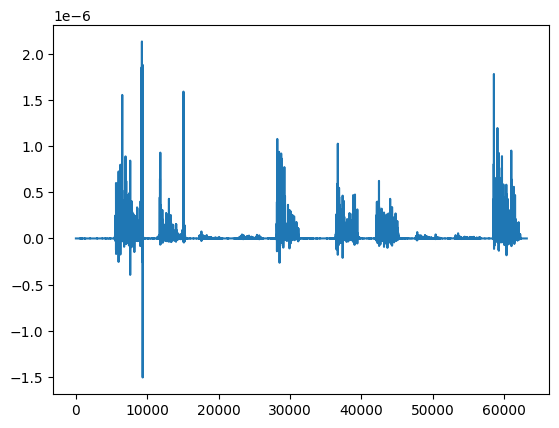

In [7]:
TKEO = tkeo(diccionario_3d[1]['channel1'])
print(TKEO)
time = np.arange(0,len(TKEO))
plt.plot(diccionario_3d[1]['time'],diccionario_3d[1]['channel1'])
plt.show()
plt.plot(time,TKEO)
plt.show()

## Punto 2 
saquenme de aqui

In [8]:
def tkeo_multiple(n_canal,df):
    res_canales = np.zeros((len(df)-2, n_canal))
    canales = ['channel1', 'channel2', 'channel3','channel4','channel5','channel6','channel7','channel8']
    for i in np.arange(1,n_canal+1):
        arreglo = np.array(df[f'channel{i}'])
        ar_tkeo = tkeo(arreglo)
        res_canales[:, i-1] = ar_tkeo
    df_tkeo = pd.DataFrame(res_canales, columns=canales)
    return df_tkeo

In [9]:
a = tkeo_multiple(8,diccionario_3d[1])
print(a)
print(a.shape)

           channel1      channel2      channel3      channel4      channel5  \
0      2.000000e-10  6.000000e-10  3.000000e-10  9.000000e-10  0.000000e+00   
1      2.000000e-10  3.000000e-10  6.000000e-10  0.000000e+00  1.000000e-10   
2      0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
3      0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
4      0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
...             ...           ...           ...           ...           ...   
63189  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
63190  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
63191  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
63192  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
63193  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

           channel6      channel7      channel8  
0

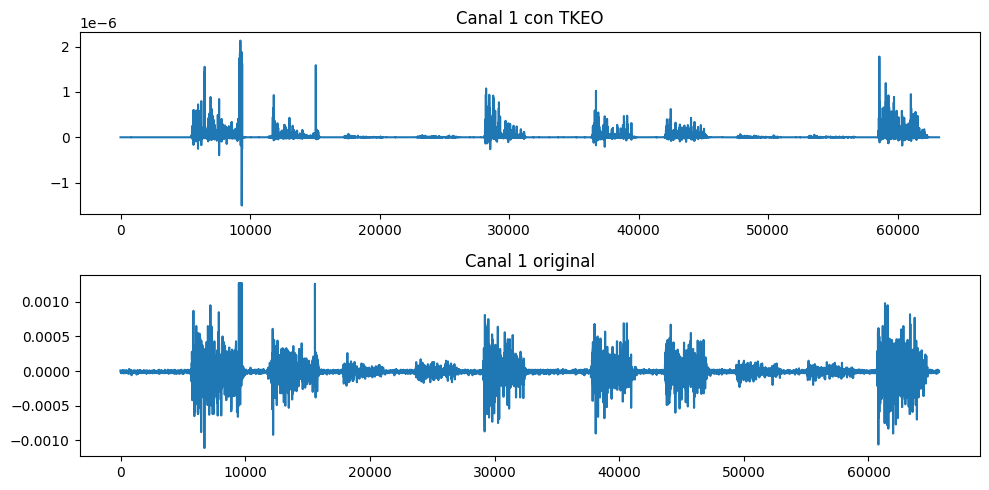

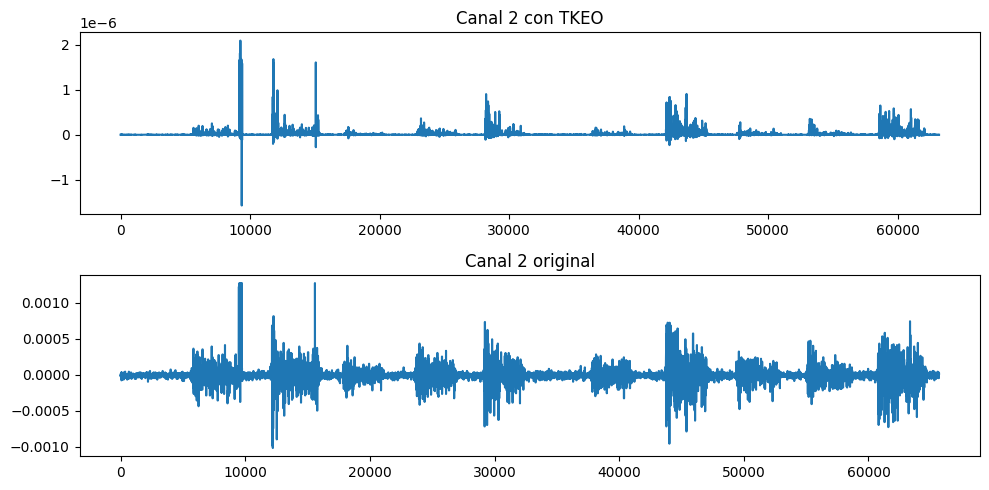

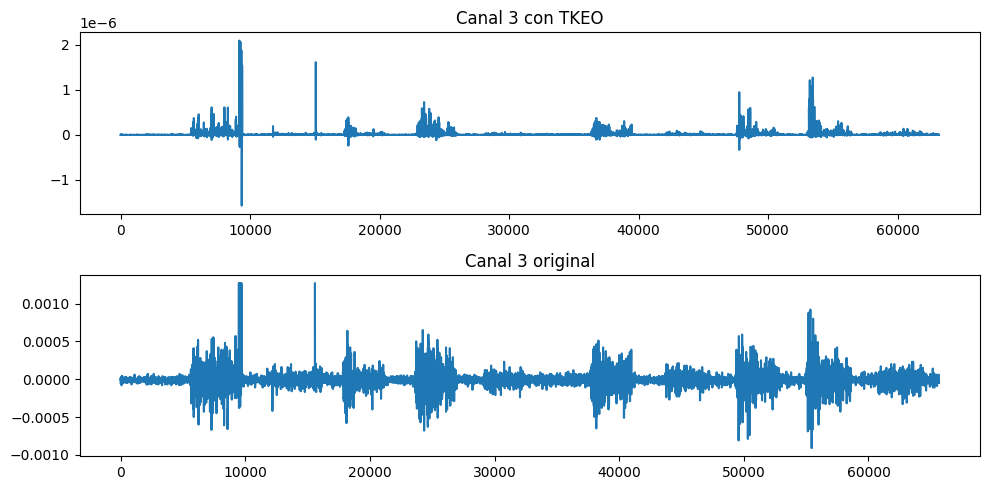

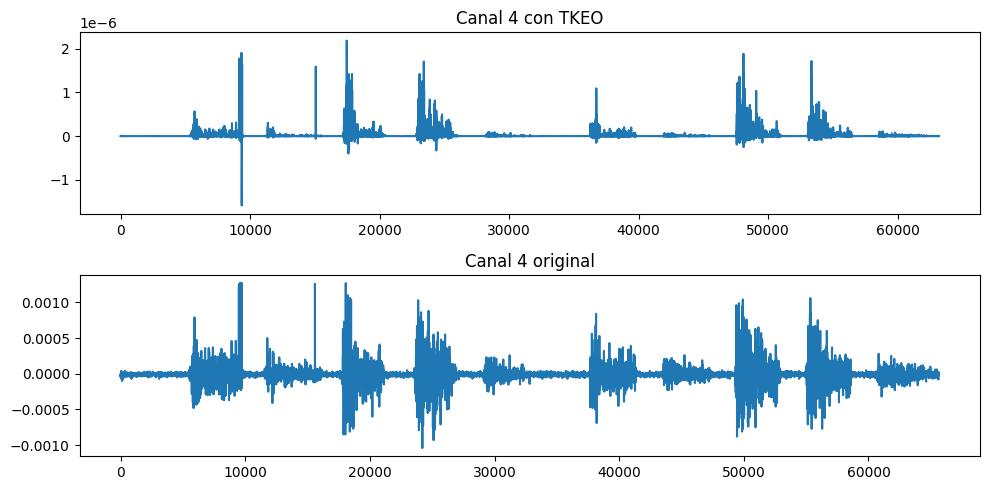

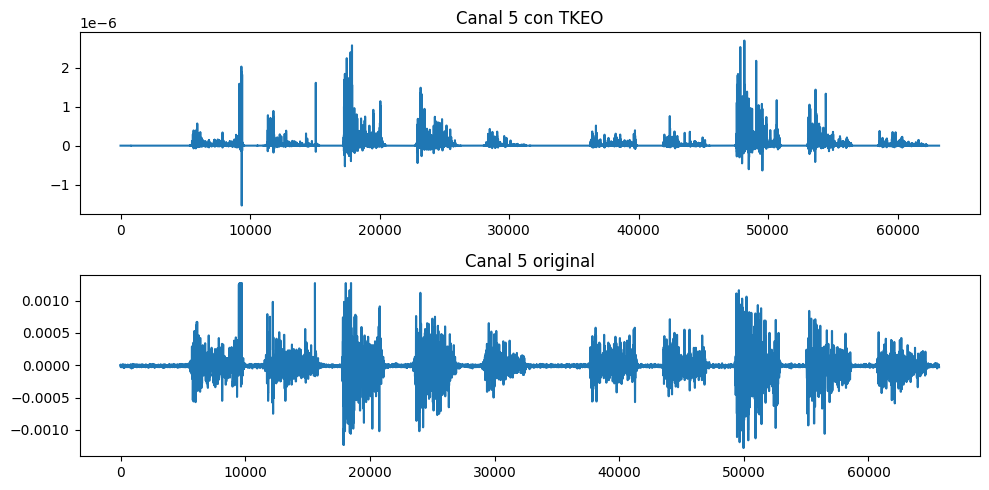

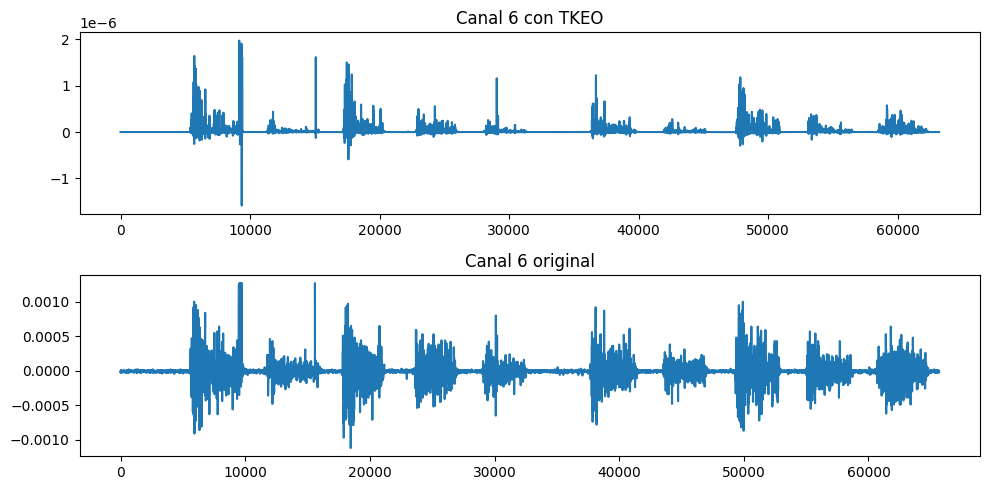

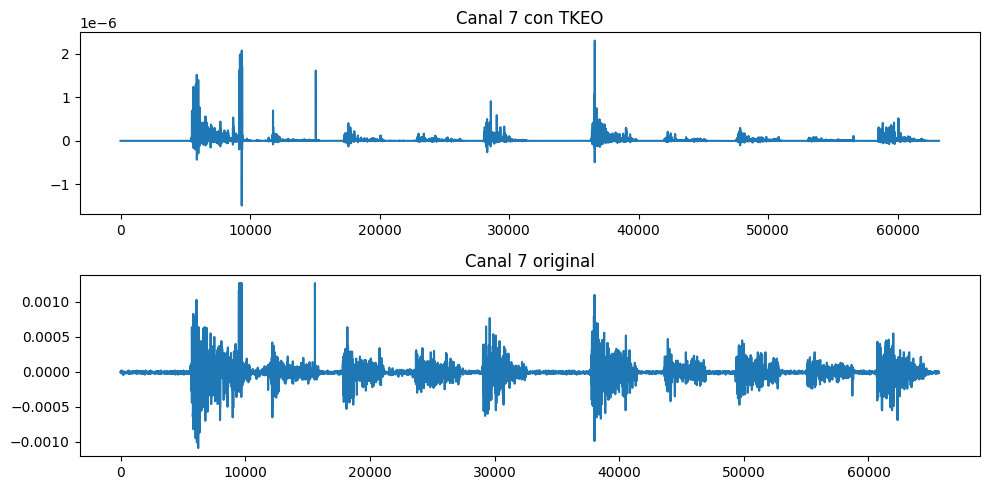

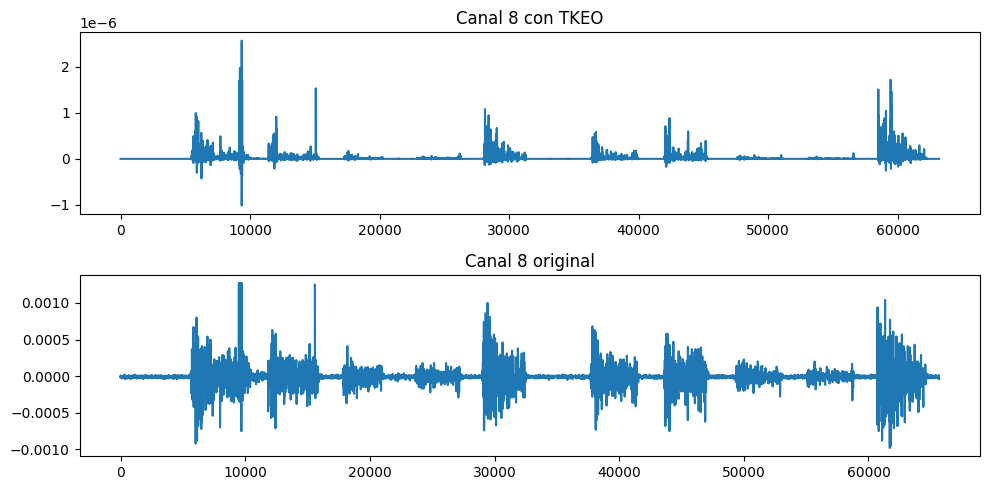

In [11]:
t = np.arange(1,len(a['channel1'])+1)
for i in np.arange(1,9):
    plt.figure(figsize=(10, 5))
    
    plt.subplot(2, 1, 1)
    plt.plot(t, a[f'channel{i}'])
    plt.title(f'Canal {i} con TKEO')

    plt.subplot(2, 1, 2)
    plt.plot(diccionario_3d[1]['time'], diccionario_3d[1][f'channel{i}'])
    plt.title(f'Canal {i} original')

    plt.tight_layout()
    plt.show()

## Punto 3 
Dioj mioooooo ya no quiero maaaaas

In [12]:
def calcularRMS(X):
  N=X.size #Cantidad de puntos
  rms=(np.sum(X**(2))/N)**0.5
  return rms

In [13]:
def var_est(n_canal, df):
    res_canales = np.zeros((8, n_canal * 7))
    estadisticas = ['C_1RMS', 'C_1Var', 'C_1MAV', 'C_1MAVS', 'C_1SSC', 'C_1WL', 'C_1ZC',
                    'C_2RMS', 'C_2Var', 'C_2MAV', 'C_2MAVS', 'C_2SSC', 'C_2WL', 'C_2ZC',
                    'C_3RMS', 'C_3Var', 'C_3MAV', 'C_3MAVS', 'C_3SSC', 'C_3WL', 'C_3ZC',
                    'C_4RMS', 'C_4Var', 'C_4MAV', 'C_4MAVS', 'C_4SSC', 'C_4WL', 'C_4ZC',
                    'C_5RMS', 'C_5Var', 'C_5MAV', 'C_5MAVS', 'C_5SSC', 'C_5WL', 'C_5ZC',
                    'C_6RMS', 'C_6Var', 'C_6MAV', 'C_6MAVS', 'C_6SSC', 'C_6WL', 'C_6ZC',
                    'C_7RMS', 'C_7Var', 'C_7MAV', 'C_7MAVS', 'C_7SSC', 'C_7WL', 'C_7ZC',
                    'C_8RMS', 'C_8Var', 'C_8MAV', 'C_8MAVS', 'C_8SSC', 'C_8WL', 'C_8ZC']

    for i in range(8):
        lista_move = [] 
        df_p1 = df[df['class'] == i] 
        for j in range(1, n_canal + 1):
            arreglo = np.array(df_p1[f'channel{j}'])
            rms = calcularRMS(arreglo)
            var = np.var(arreglo)
            mean = np.mean(np.abs(arreglo))
            mean_slope = np.mean(np.abs(np.diff(arreglo)))
            sl_sign_c = np.sum(np.abs(np.diff(np.sign(np.diff(arreglo)))))
            wl_values = np.sum(np.abs(np.diff(arreglo)))
            zero_crossings = np.sum(np.diff(np.sign(arreglo)))
            lista = [rms, var, mean, mean_slope, sl_sign_c, wl_values, zero_crossings]
            lista_move.append(lista)
            
        lista_array = np.array(lista_move)
        res_canales[i, :] = lista_array.flatten() 
    
    df_estadisticas = pd.DataFrame(res_canales, columns=estadisticas, index=[f'class {i}' for i in range(0, 8)])
    return df_estadisticas

## Punto 4
Ya no siento nada 

In [86]:
def var_est_con_TKEO(n_canal, df):
    res_canales_list = []
    estadisticas = ['class','C_1RMS', 'C_1Var', 'C_1MAV', 'C_1MAVS', 'C_1SSC', 'C_1WL', 'C_1ZC',
                    'C_2RMS', 'C_2Var', 'C_2MAV', 'C_2MAVS', 'C_2SSC', 'C_2WL', 'C_2ZC',
                    'C_3RMS', 'C_3Var', 'C_3MAV', 'C_3MAVS', 'C_3SSC', 'C_3WL', 'C_3ZC',
                    'C_4RMS', 'C_4Var', 'C_4MAV', 'C_4MAVS', 'C_4SSC', 'C_4WL', 'C_4ZC',
                    'C_5RMS', 'C_5Var', 'C_5MAV', 'C_5MAVS', 'C_5SSC', 'C_5WL', 'C_5ZC',
                    'C_6RMS', 'C_6Var', 'C_6MAV', 'C_6MAVS', 'C_6SSC', 'C_6WL', 'C_6ZC',
                    'C_7RMS', 'C_7Var', 'C_7MAV', 'C_7MAVS', 'C_7SSC', 'C_7WL', 'C_7ZC',
                    'C_8RMS', 'C_8Var', 'C_8MAV', 'C_8MAVS', 'C_8SSC', 'C_8WL', 'C_8ZC']
    clase = []
    for i in range(8):
        clase = [i]
        lista_move = [] 
        df_p1 = df[df['class'] == i] 
        if len(df_p1>0):
            df_p1 = tkeo_multiple(8,df_p1)
        for j in range(1, n_canal + 1):
            arreglo = np.array(df_p1[f'channel{j}'])
            rms = calcularRMS(arreglo)
            var = np.var(arreglo)
            mean = np.mean(np.abs(arreglo))
            mean_slope = np.mean(np.abs(np.diff(arreglo)))
            sl_sign_c = np.sum(np.abs(np.diff(np.sign(np.diff(arreglo)))))
            wl_values = np.sum(np.abs(np.diff(arreglo)))
            zero_crossings = np.sum(np.diff(np.sign(arreglo)))
            lista = [rms, var, mean, mean_slope, sl_sign_c, wl_values, zero_crossings]
            lista_move.extend(lista)
        
        clase.extend(lista_move)        
        res_canales_list.append(clase)
        
    df_estadisticas = pd.DataFrame(res_canales_list, columns=estadisticas)
    return df_estadisticas

In [87]:
dkfng = var_est_con_TKEO(8, diccionario_3d[1])
print(dkfng)
    

   class        C_1RMS        C_1Var        C_1MAV       C_1MAVS   C_1SSC  \
0      0  4.949783e-08  2.436317e-15  4.241362e-09  6.386164e-09  13836.0   
1      1  2.036785e-10  4.023252e-20  4.507676e-11  7.704527e-11   1150.0   
2      2  6.104217e-08  3.627260e-15  1.171930e-08  1.749750e-08   1276.0   
3      3  2.884867e-08  8.020714e-16  6.435632e-09  9.681091e-09   1302.0   
4      4  2.416603e-09  5.629370e-18  5.396918e-10  7.912158e-10   1202.0   
5      5  2.379399e-09  5.426908e-18  5.378079e-10  7.467331e-10   1070.0   
6      6  5.662843e-08  3.077611e-15  1.272860e-08  1.805430e-08   1289.0   
7      7           NaN           NaN           NaN           NaN      0.0   

          C_1WL  C_1ZC        C_2RMS        C_2Var  ...   C_7SSC  \
0  2.635506e-04   -1.0  4.707130e-08  2.203163e-15  ...  13649.0   
1  2.910000e-07    0.0  6.176704e-10  3.671332e-19  ...   1121.0   
2  6.162620e-05   -1.0  1.394502e-08  1.879858e-16  ...   1246.0   
3  3.691400e-05    0.0  4.354971e-

C:\Users\Juan Manuel\AppData\Local\Temp\ipykernel_21608\2966749409.py:3: RuntimeWarning: invalid value encountered in scalar divide
  rms=(np.sum(X**(2))/N)**0.5
C:\Users\Juan Manuel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Juan Manuel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\Users\Juan Manuel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / r

Vamos a hacer un diccionario donde la clave sea el paciente y el valor sea un DF que incluya los 8 canales de cada paciente aplicando el TKEO.

{'P1':            channel1      channel2      channel3      channel4      channel5  \
0      2.000000e-10  6.000000e-10  3.000000e-10  9.000000e-10  0.000000e+00   
1      2.000000e-10  3.000000e-10  6.000000e-10  0.000000e+00  1.000000e-10   
2      0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
3      0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
4      0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
...             ...           ...           ...           ...           ...   
63189  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
63190  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
63191  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
63192  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
63193  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

           channel6      channel7      chann

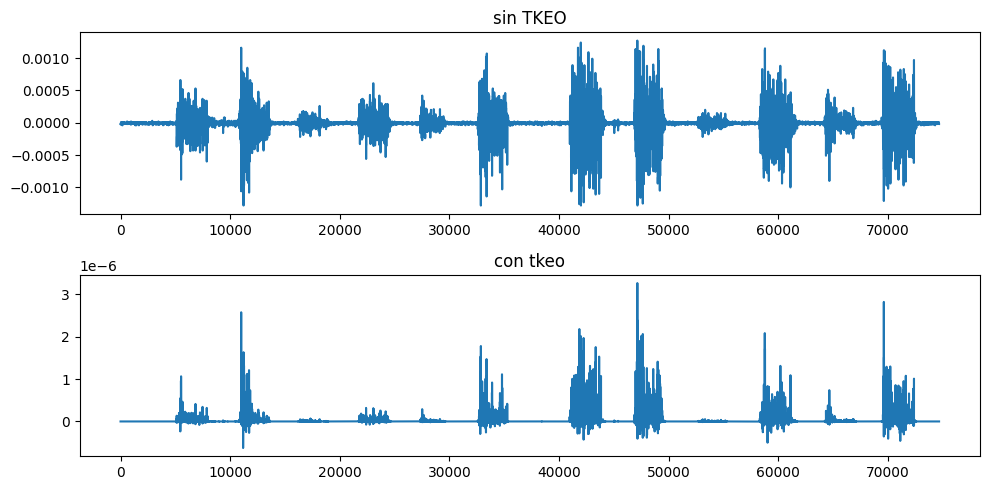

In [62]:
diccionario_Tkeo = {}
i = 0
for pac in diccionario_3d.values():
    i+=1
    diccionario_Tkeo[f'P{i}'] = tkeo_multiple(8,pac)
print(diccionario_Tkeo)    
#print(diccionario_Tkeo['P10'])

t = np.arange(0,len(diccionario_3d[11]['channel1']))
t_tkeo = np.arange(0,len(diccionario_Tkeo['P11']['channel1']))
plt.figure(figsize=(10, 5))
    
plt.subplot(2, 1, 1)
plt.plot(t, diccionario_3d[11]['channel1'])
plt.title('sin TKEO')

plt.subplot(2, 1, 2)
plt.plot(t_tkeo, diccionario_Tkeo['P11']['channel1'])
plt.title('con tkeo')

plt.tight_layout()
plt.show()

In [102]:
i = 0
df_final = pd.DataFrame()
for pac in diccionario_3d.values():
    i+=1
    df_np = pd.DataFrame({'Sujeto': (np.ones(8, dtype=int))* i,'class': np.arange(0, 8)})   
    df_tkeo = pd.DataFrame({'Tkeo': np.ones(8, dtype=int),'class': np.arange(0, 8)}) 
    df_final_Tkeo = var_est_con_TKEO(8,pac)
    
    df_final_Tkeo = pd.merge(df_np, df_final_Tkeo, how = 'left', on = 'class')
    df_final_Tkeo = pd.merge(df_final_Tkeo, df_tkeo, how = 'left', on = 'class')
    
    #df_final.append(df_final_Tkeo)
    df_final = pd.concat([df_final,df_final_Tkeo],axis=0)
print(df_final)

C:\Users\Juan Manuel\AppData\Local\Temp\ipykernel_21608\2966749409.py:3: RuntimeWarning: invalid value encountered in scalar divide
  rms=(np.sum(X**(2))/N)**0.5
C:\Users\Juan Manuel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Juan Manuel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\Users\Juan Manuel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / r

    Sujeto  class        C_1RMS        C_1Var        C_1MAV       C_1MAVS  \
0        1      0  4.949783e-08  2.436317e-15  4.241362e-09  6.386164e-09   
1        1      1  2.036785e-10  4.023252e-20  4.507676e-11  7.704527e-11   
2        1      2  6.104217e-08  3.627260e-15  1.171930e-08  1.749750e-08   
3        1      3  2.884867e-08  8.020714e-16  6.435632e-09  9.681091e-09   
4        1      4  2.416603e-09  5.629370e-18  5.396918e-10  7.912158e-10   
..     ...    ...           ...           ...           ...           ...   
3       36      3  3.769563e-08  1.370799e-15  8.201657e-09  1.216178e-08   
4       36      4  1.852621e-09  3.293449e-18  4.318598e-10  6.233733e-10   
5       36      5  2.280261e-08  4.974427e-16  5.432824e-09  7.918550e-09   
6       36      6  1.185381e-08  1.355347e-16  2.518608e-09  3.758293e-09   
7       36      7           NaN           NaN           NaN           NaN   

     C_1SSC         C_1WL  C_1ZC        C_2RMS  ...         C_7WL  C_7ZC  \

C:\Users\Juan Manuel\AppData\Local\Temp\ipykernel_21608\2966749409.py:3: RuntimeWarning: invalid value encountered in scalar divide
  rms=(np.sum(X**(2))/N)**0.5
C:\Users\Juan Manuel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Juan Manuel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\Users\Juan Manuel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / r